# Brownian Motion

Brownian motion is a random movement,  
it is useful in quantitative finance to model  
the ranom movement of an asset over the time period.

## Random Walk

When we wanna model brownian motion either arithmetic or geometric  
we have to start by modelling something called random walk.

Random walk is a random movement,
we can imagine it as a drunk person walking,  
he moves forward and can either step 1 up or 1 down,  
or we can imagine it as coint tosses. 

In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
S = 5  # number of simulations
t = 10 # time steps

In [3]:
coin_tosses_set = [-1, 1]
steps = np.random.choice(coin_tosses_set, size=(S, t)).T
origin = np.zeros((1, S))
random_walks = np.concatenate([origin, steps]).cumsum(0)

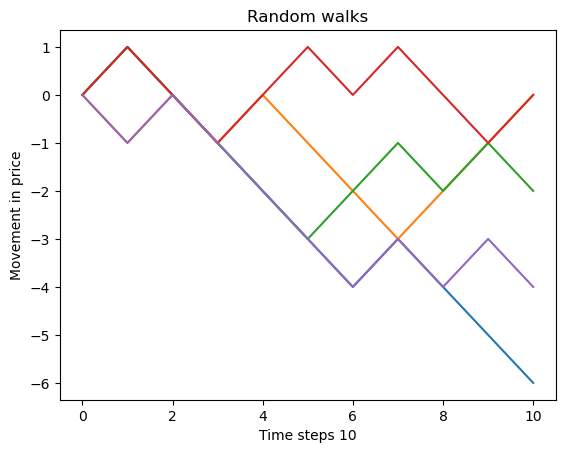

In [4]:
plt.plot(random_walks)
plt.title("Random walks")
plt.xlabel("Time steps {}".format(t))
plt.ylabel("Movement in price")
plt.show()

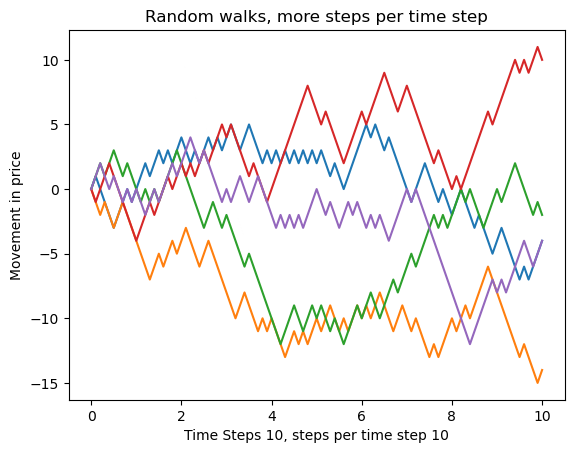

In [5]:
S = 5  # number of simulations
t = 10 # time steps 
n = 10 # number of walk steps during one time step

coin_tosses_set = [-1, 1]
steps = np.random.choice(coin_tosses_set, 
                                          size=(S, t*n)).T
origin = np.zeros((1, S))
random_walks = np.concatenate([origin, steps]).cumsum(0)

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(S, t*n+1), fill_value=time)
tt = tt.T

plt.plot(tt,random_walks)
plt.title("Random walks, more steps per time step")
plt.xlabel("Time Steps {}, steps per time step {}".format(t, n))
plt.ylabel("Movement in price")
plt.show()

## Distribution of a RW

Random Walks are normally distributed. I even created a volume profile to show the distribution in the ranom walks modelling.

The Vlume profile is drawn and then the probability density function is drawn from the sample.

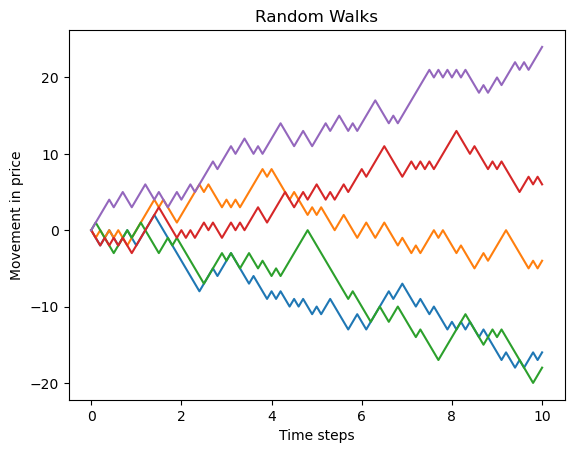

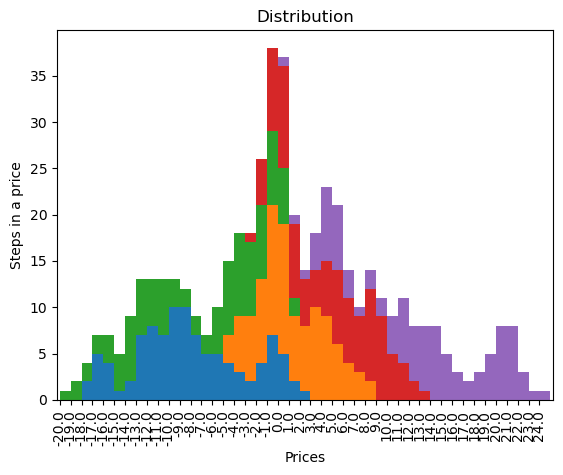

In [6]:
S = 5   # number of simulations
t = 10  # time steps 
n = 10  # number of steps during one time step

coin_tosses_set = [-1, 1]
steps = np.random.choice(coin_tosses_set, size=(S, t*n)).T
origin = np.zeros((1, S))
random_walks = DataFrame(np.concatenate([origin, steps]).cumsum(0))

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(S, t*n+1), fill_value=time)
tt = tt.T

dist = DataFrame(random_walks).apply(lambda x: x.value_counts()).sort_index()

plt.plot(tt, random_walks)
plt.title("Random Walks")
plt.xlabel("Time steps")
plt.ylabel("Movement in price")
plt.show()

dist.plot.bar(stacked=True, align='edge', width=1.0, legend=None)
plt.title("Distribution")
plt.xlabel("Prices")
plt.ylabel("Steps in a price")
plt.show()

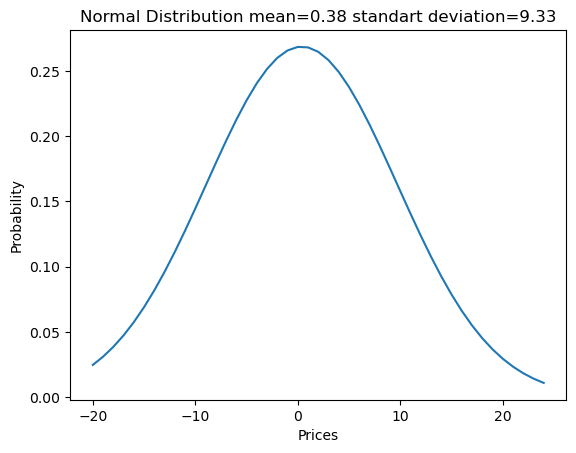

In [7]:
x_axis = np.arange(dist.index.min(), dist.index.max()+1)
dist['occur_at_price'] = dist.sum('columns')
dist['price_t_occur'] = dist.occur_at_price * dist.index
mean = dist.price_t_occur.sum() / dist.occur_at_price.sum()

prices = []
summing = []
for ind in dist.index:
    for i in range(int(dist.occur_at_price.loc[ind])):
        prices.append(ind)

for price in prices:
    summing.append((price - mean)**2)

summing = np.array(summing)
sd = np.sqrt(summing.sum() / dist.occur_at_price.sum())

pdf_product = (1/sd*np.sqrt(2*np.pi)) * np.exp(-(x_axis-mean)**2/(2*sd**2))
plt.plot(dist.index, pdf_product)
plt.title("Normal Distribution mean={} standart deviation={}".format(round(mean, 2), round(sd, 2)))
plt.xlabel("Prices")
plt.ylabel("Probability")
plt.show()

# Normal Distribution

Normal or gaussion distribution is distribution with mean mu and standart deviation sigma. 

Below is a normal distribution probability density function or pdf(f(x, mu, sigma))

$$
X \sim \mathcal{N}(\mu,\sigma^2)\\
f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

We need to calculate the mean and standart deviation to be able to construct how the distribution looks.

$$
\bar{X} : Mean\\
S: Standart Deviation\\
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i\\
S = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2}
$$

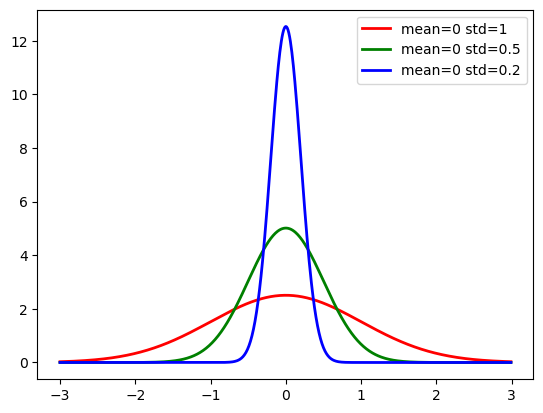

In [14]:
x = np.arange(-3, 3, .01)
mu1, sigma1 = 0, 1
mu2, sigma2 = 0, 0.5
mu3, sigma3 = 0, 0.2

pdf1 = (1/sigma1*np.sqrt(2*np.pi)) * np.exp(-(x-mu1)**2/(2*sigma1**2))
pdf2 = (1/sigma2*np.sqrt(2*np.pi)) * np.exp(-(x-mu2)**2/(2*sigma2**2))
pdf3 = (1/sigma3*np.sqrt(2*np.pi)) * np.exp(-(x-mu3)**2/(2*sigma3**2))

plt.plot(x, pdf1, linewidth=2, color='r', label='mean={} std={}'.format(mu1, sigma1))
plt.plot(x, pdf2, linewidth=2, color='g', label='mean={} std={}'.format(mu2, sigma2))
plt.plot(x, pdf3, linewidth=2, color='b', label='mean={} std={}'.format(mu3, sigma3))
plt.legend()
plt.axis('tight')
plt.show()

## Arithmetic Brownian Motion

In arithmetic brownian motion the motion is made of steps that are norally distributed. Steps are then summed and the process is called arithmetic brownian motion.  

The problem is that the potentional asset prices can be negative and therefore we have to introduce new concept being geometric bm. There the prices can never be negative, therefore is a better reflection of world.

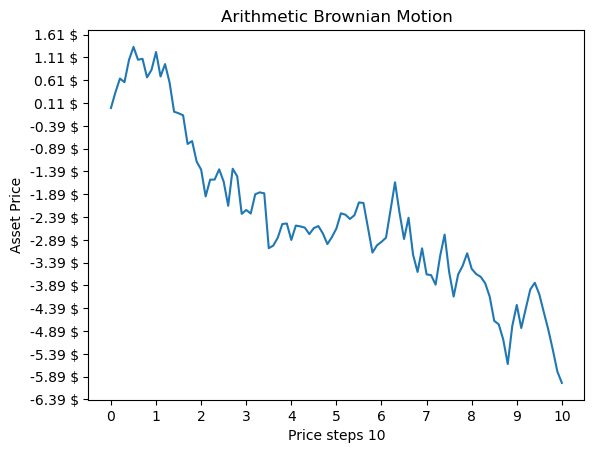

In [9]:
from matplotlib.ticker import FormatStrFormatter

S = 1    # number of simulations
t = 10   # time
n = 100  # number of steps per time
s = .4   # volatility sigma

steps = np.random.normal(0, s, size=(S, n)).T
origin = np.zeros((1, S))
brownian_motion = np.concatenate([origin, steps]).cumsum(0)

time = np.linspace(0, t, n+1)
tt = np.full(shape=(S, n+1), fill_value=time)
tt = tt.T

plt.plot(tt, brownian_motion)
plt.title("Arithmetic Brownian Motion")
plt.xlabel("Price steps {}".format(t))
plt.ylabel("Asset Price")

start, end = plt.gca().get_xlim()
plt.gca().xaxis.set_ticks(np.arange(0, end))

start, end = plt.gca().get_ylim()
plt.gca().yaxis.set_ticks(np.around(np.arange(start, end, .5), 2))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f $'))

plt.show()

# Geometric Brownian Motion

In Geometric BM the movement is a product of log-normally distributed steps.  

The upside is that this type of random motion can never be zero and therefore is a better reflection of a real, random movement of asset prices.

In [10]:
mu = .1     # drift coeficient
n = 100     # number of steps
T = 1       # time steps
S = 10      # number of simulations
S0 = 450    # initial asset price
sigma = .3  # volatility

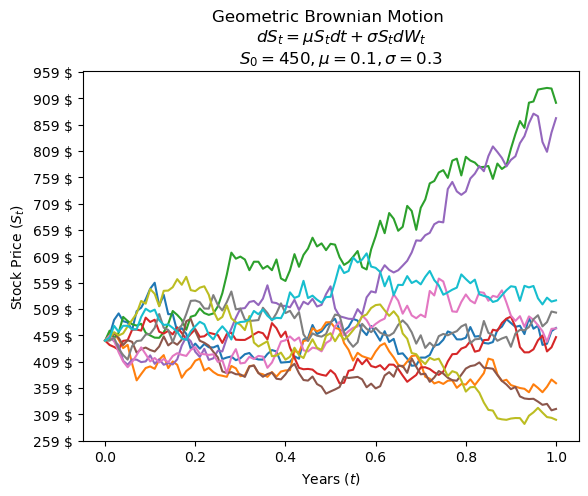

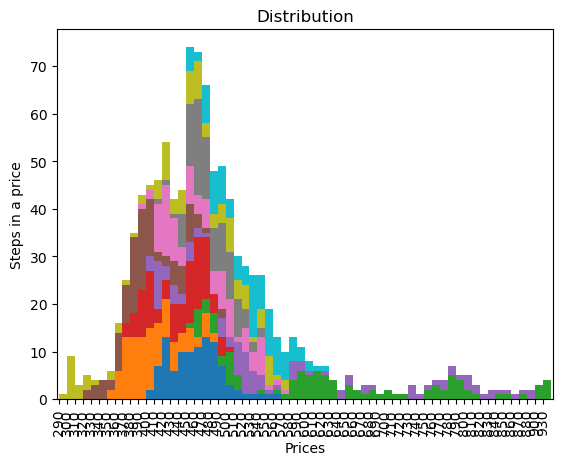

In [11]:
dt = T/n

gbm = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(S,n)).T
)
gbm = np.vstack([np.ones(S), gbm])
gbm = S0 * gbm.cumprod(axis=0)

time = np.linspace(0, T, n+1)
tt = np.full(shape=(S, n+1), fill_value=time).T

plt.plot(tt, gbm)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    """Geometric Brownian Motion 
    $dS_t = \mu S_t dt + \sigma S_t dW_t$ 
    $S_0 = {0}, \mu = {1}, \sigma = {2}$""".format(S0, mu, sigma)
)
start, end = plt.gca().get_ylim()
plt.gca().yaxis.set_ticks(np.arange(start, end, 50))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d $'))

dist = DataFrame(gbm).round(-1).astype('int')
dist = dist.apply(lambda x: x.value_counts()).sort_index()

plot = dist.plot.bar(stacked=True, align='edge', width=1.0, legend=None,
                    title="Distribution", xlabel="Prices", ylabel="Steps in a price")

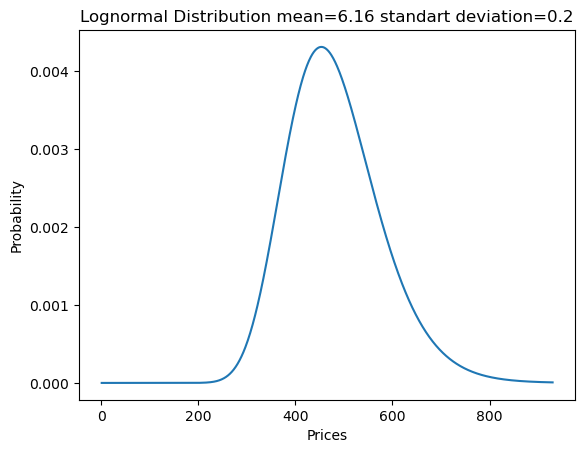

In [12]:
x_axis = np.arange(1, dist.index.max()+1)
dist['occur_at_price'] = dist.sum('columns')
dist['price_t_occur'] = dist.occur_at_price * np.log(dist.index)
mean = dist.price_t_occur.sum() / dist.occur_at_price.sum() # mean of a distribution

prices = []
summing = []
for ind in dist.index:
    for i in range(int(dist.occur_at_price.loc[ind])):
        prices.append(ind)

for price in prices:
    summing.append((np.log(price) - mean)**2)

summing = np.array(summing)
sd = np.sqrt(summing.sum() / dist.occur_at_price.sum())
sd = 0.2
pdf_product = (np.exp(-(np.log(x_axis) - mean)**2 / (2 * sd**2)) 
               / (x_axis * sd * np.sqrt(2 * np.pi)))
plt.plot(x_axis, pdf_product)
plt.title("Lognormal Distribution mean={} standart deviation={}".format(round(mean, 2), round(sd, 2)))
plt.xlabel("Prices")
plt.ylabel("Probability")
plt.show()

# Lognormal Distribution

The geometric aussion distribution is log normally distributed and therefore cn neer be negative.  

Below are pdf of a log normal distribution and also the log mean and log standart deviation.  

$$
f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}\\
\mu_{\text{log}} = e^{\mu + \frac{\sigma^2}{2}}\\
\sigma_{\text{log}} = e^{2\mu + \sigma^2}(e^{\sigma^2} - 1)^{0.5}\\
$$

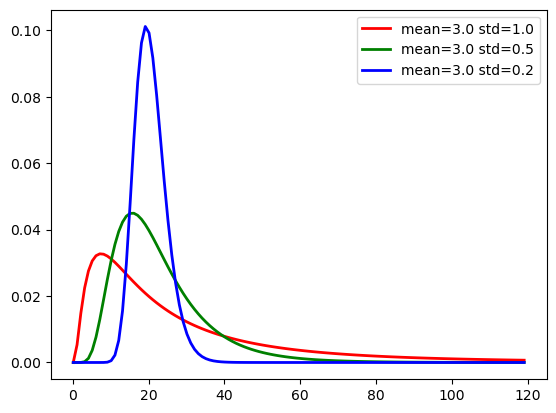

In [13]:
x = np.arange(0.1, 120)
mu1, sigma1 = 3., 1.
mu2, sigma2 = 3., 0.5
mu3, sigma3 = 3., 0.2

pdf1 = (np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))
       / (x * sigma1 * np.sqrt(2 * np.pi)))
pdf2 = (np.exp(-(np.log(x) - mu2)**2 / (2 * sigma2**2))
       / (x * sigma2 * np.sqrt(2 * np.pi)))
pdf3 = (np.exp(-(np.log(x) - mu3)**2 / (2 * sigma3**2))
       / (x * sigma3 * np.sqrt(2 * np.pi)))

plt.plot(x, pdf1, linewidth=2, color='r', label='mean={} std={}'.format(mu1, sigma1))
plt.plot(x, pdf2, linewidth=2, color='g', label='mean={} std={}'.format(mu2, sigma2))
plt.plot(x, pdf3, linewidth=2, color='b', label='mean={} std={}'.format(mu3, sigma3))
plt.axis('tight')
plt.legend()
plt.show()